In [50]:
import glob2 as glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

# Import NGDLM models.
!pip install git+https://github.com/AI-Guru/ngdlm.git
from ngdlm import models as ngdlmodels

  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-7e_2swky
  Running setup.py bdist_wheel for ngdlm ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-bojntam9/wheels/93/06/27/e156acb49f475c364c3c9fa4ad4ab7bfa38808bff5bf9c4647
Successfully built ngdlm


In [52]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras import models, layers


In [108]:
latent_dim = 4

# Encoder.
encoder_input = layers.Input(shape=(128, 128))
encoder_output = layers.Reshape((128 * 128,))(encoder_input)
encoder_output = layers.Dense(512, activation = "relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

# Decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(128*128, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((128, 128))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# Autoencoder.
autoencoder = ngdlmodels.VAE(encoder, decoder, latent_dim=latent_dim)    #glue encoder and decoder together
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")
autoencoder.summary()

Encoder:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           (None, 128, 128)     0                                            
__________________________________________________________________________________________________
reshape_18 (Reshape)            (None, 16384)        0           input_52[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 512)          8389120     reshape_18[0][0]                 
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_43[0][0]                   
__________________________________________________________________________________________________
z

In [111]:
# Train- and validation-data.
from PIL import Image
import glob2 as glob
from aux_functions import helpers

image_list = []
for filename in glob.glob('../data/a/*.png'): #assuming gif
    im=np.array(Image.open(filename))
    im=helpers.rgb2gray(im)
    image_list.append(im)

In [113]:
x_input_train = np.array(image_list)
#(x_train, _), (x_test, _)= mnist.load_data()

x_input_train = x_input_train.astype('float32')/255.0
#x_input_validate = x_test.astype('float32')/255.0 

x_input_train = x_input_train.reshape((-1, 128, 128))

In [114]:
x_input_train.shape

(369, 128, 128)

In [115]:
# Train.
print("Train...")
history = autoencoder.fit(
        x_input_train, x_input_train,
        epochs=10,
        batch_size=1,
        shuffle=True
        #validation_data=(x_input_validate, x_input_validate)
    )

# Evaluate.
#print("Evaluate...")
#loss = autoencoder.evaluate(x_input_test, x_input_test)
#print("Loss:", loss)

Train...
Epoch 1/10
369/369 [==============================] - 84s 228ms/step - loss: 0.3415
Epoch 2/10
369/369 [==============================] - 77s 209ms/step - loss: 0.2574
Epoch 3/10
369/369 [==============================] - 79s 215ms/step - loss: 0.2501
Epoch 4/10
369/369 [==============================] - 78s 212ms/step - loss: 0.2465
Epoch 5/10
369/369 [==============================] - 77s 210ms/step - loss: 0.2426
Epoch 6/10
369/369 [==============================] - 79s 214ms/step - loss: 0.2406
Epoch 7/10
369/369 [==============================] - 83s 225ms/step - loss: 0.2381
Epoch 8/10
369/369 [==============================] - 81s 220ms/step - loss: 0.2318
Epoch 9/10
369/369 [==============================] - 77s 209ms/step - loss: 0.2274
Epoch 10/10
369/369 [==============================] - 83s 224ms/step - loss: 0.2253


In [116]:
decoded_imgs = autoencoder.predict(x_input_train) 

In [117]:
print(decoded_imgs.shape)

(369, 128, 128)


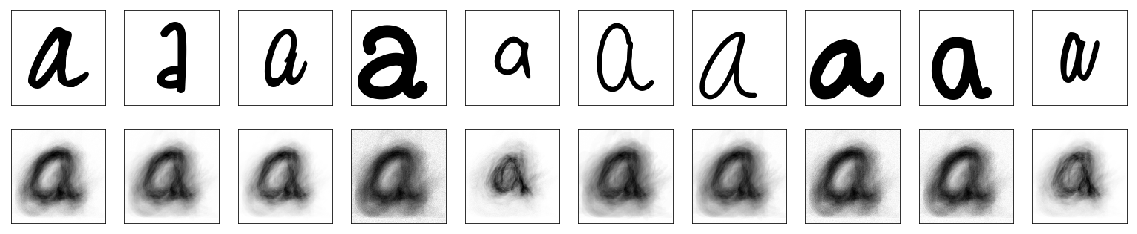

In [118]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_input_train[i].reshape((128,128)), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape((128, 128)), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()